# Ensemble Models: Random Forest (Predicting Bankruptcy in Taiwan)

I saw in the previous note book (Decision_Tree) the performance of the decision tree model .Now I'll expand my decision tree model to a forest .The random forest is an example of an Ensemble model.

An ensemble model is a machine learning technique where multiple models are combined to improve the overall accuracy and stability of my the prediction.

Random Forest is a type of ensemble machine learning algorithm that combines multiple decision trees to improve the accuracy and stability of the prediction.

In [1]:
import gzip
import json
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline


## Prepare Data

## Import

In [2]:
# import our wrangle functio created in the previous notebook
# Create wrangle function
def wrangle(filename):
    # open compressed file,load into dict
    with gzip.open(filename,"r") as f:
        data = json.load(f)
        
    # turn dict into dataframe
    df = pd.DataFrame().from_dict(data["observations"]).set_index("id")
    
    return df

In [3]:
df = wrangle("data/taiwan-bankruptcy-data.json.gz")
print("df shape:", df.shape)
df.head()

df shape: (6137, 96)


,bankrupt,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
id,,,,,,,,,,,,,,,,,,,,,
1,True,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
2,True,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
3,True,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
4,True,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
5,True,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Split

Now I'll Create my feature matrix X and target vector y. my target is "bankrupt"

In [5]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


Now i'll divide my data (X and y) into training and test sets using a randomized train-test split. my test set should be 20% of your total data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


## Resample

I am going to use the over_sampling method because from the previous task the model performed best in terms of the test accuracy.

In [7]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


# Build Model

## Baseline

In [8]:
# Calculate the baseline accuracy score for my model.
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9688


## Iterate

Ensemble models work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction. Since we used a decision tree in the last project, we're going to create an ensemble of trees here.

Now I'll Create a pipeline named clf (short for "classifier") that contains a RandomForestClassifier predictor

In [9]:
clf = RandomForestClassifier(random_state=42)
print(clf)

RandomForestClassifier(random_state=42)


By default, the number of trees in our forest (n_estimators) is set to 100. That means when I train this classifier,i'll be fitting 100 trees.

Next I'll perform cross validation on the oversampled data sets. With cross validation there is no need to split the data to a validation set .this technique helps to tune Hyperparameters of our model here by boosting model performance.

Next I'll Perform cross-validation with my classifier, using the over-sampled training data. I want five folds, so I set cv to 5. I also want to speed up training, so I set n_jobs to -1.

In [10]:
cv_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_scores)

[0.99316868 0.99474514 0.99369085 0.99369085 0.9957939 ]


Next I'll Create a dictionary with the range of hyperparameters that I want to evaluate for our classifier.

In [12]:
# Create a dictionary with the range of hyperparameters that we want to evaluate for our classifier
params = {
    "n_estimators": range(25,100,25),
    "max_depth": range(10,50,10)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

Now that I have my hyperparameter grid, I'll incorporate it into a grid search.

Next I'll Create a GridSearchCV named model that includes my classifier and hyperparameter grid.

In [13]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

Next I'll Fit model to the over-sampled training data.


In [14]:
# Train model
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

Next I'll Extract the cross-validation results from model and load them into a DataFrame named cv_results

In [15]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.316659,0.067570,0.036461,0.029978,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.981608,0.980032,0.979495,0.981073,0.980547,0.980551,0.000745,11
1,2.559248,0.084913,0.031118,0.026681,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.983184,0.981608,0.977918,0.980021,0.981073,0.980761,0.001750,10
2,3.821787,0.037695,0.077600,0.023561,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.983184,0.981083,0.977392,0.979495,0.981073,0.980445,0.001925,12
3,1.553781,0.039280,0.024901,0.025706,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.990541,0.986863,0.985804,0.990011,0.989485,0.988541,0.001863,9
4,3.005867,0.078105,0.070763,0.025390,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.990541,0.990016,0.987907,0.990011,0.990011,0.989697,0.000918,7
5,4.677939,0.273627,0.081217,0.026264,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.991067,0.989490,0.987382,0.988433,0.990011,0.989276,0.001272,8
6,1.639158,0.035886,0.024794,0.024961,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.992643,0.993694,0.992114,0.993165,0.993165,0.992956,0.000537,6
7,3.219089,0.037025,0.059712,0.030202,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.992118,0.993694,0.992114,0.993165,0.994217,0.993061,0.000841,5
8,4.835394,0.040674,0.081885,0.024302,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992118,0.993694,0.993165,0.993691,0.994742,0.993482,0.000853,4
9,1.651849,0.040611,0.025644,0.025366,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.994220,0.994220,0.994742,0.993165,0.994742,0.994218,0.000576,3


First, I'll look at n_estimators. My grid search evaluated this hyperparameter for various max_depth settings, but I'll only look at models where max_depth equals 10.

I'll Create a mask for cv_results for rows where "param_randomforestclassifier__max_depth" equals 10. Then plot "param_randomforestclassifier__n_estimators" on the x-axis and "mean_fit_time"

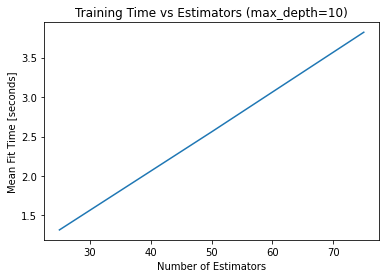

In [18]:
# Create mask
mask = cv_results["param_max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
     cv_results[mask]["param_n_estimators"],
     cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

It can be seen from the visualization that the number of estimator increases the training time increases.

Next, I'll look at max_depth. Here, I'll also limit our data to rows where n_estimators equals 40.

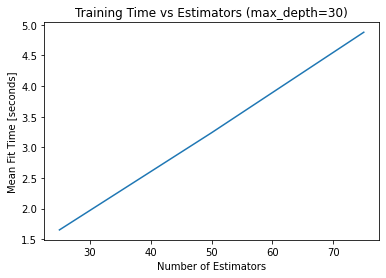

In [22]:
# Create mask
mask = cv_results["param_max_depth"] == 40
# Plot fit time vs n_estimators
plt.plot(
     cv_results[mask]["param_n_estimators"],
     cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=30)");

Finally, let's look at the hyperparameters that led to the best performance.

In [26]:
# Extract best hyperparameters
best_model_par = model.best_params_
model_best_score = model.best_score_

print(f" the best model paramters is : {best_model_par}")
print(f" the model best score is : {model_best_score}")


 the best model paramters is : {'max_depth': 40, 'n_estimators': 75}
 the model best score is : 0.9944282451804197


Note that I don't need to build and train a new model with these settings. Now that the grid search is complete, when I used model.predict(), it will serve up predictions using the best model.

## Evaluate

In [27]:
# Calculate the training and test accuracy scores for my model
acc_train =  model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9764


It can be  seen that we beat baseline.

Next, I am going to use a confusion matrix to see how my model performs. To better understand the values I'll see in the matrix, I'll first count how many observations in my test set belongs to the positive and negative classes.

In [28]:
y_test.value_counts()

False    1191
True       37
Name: bankrupt, dtype: int64

Next I'll Plot a confusion matrix that shows how my best model performs on my test set.

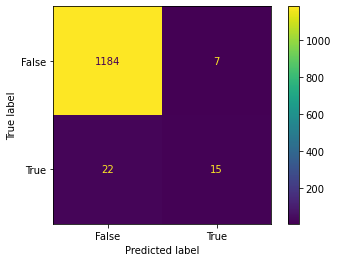

In [29]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

Notice the relationship between the numbers in this matrix with the count I did in the previous task it can be seen the random forest did better in predictions than the decision tree.summing the values in the bottom row, you get the total number of positive observations in y_test ( 22+15=37). And the top row sum to the number of negative observations ( 1184+7=1191)
 

# Communicate

Now I'll Create a horizontal bar chart with the 15 most important features for model.

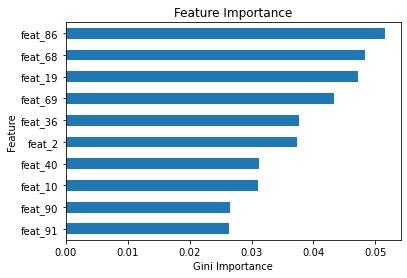

In [32]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = importances = model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

It can be see from the visualization that feat_86 is our most important feature followed by feat_36 aand feat_40 respectively. Also notice the increase in the Gini importance scores ,this is a clear indication that the ensemble model (random forest) did better than the decision tree model.

Finally Using a context manager, I'll save your best-performing model to a a file named "model-random-forest.pkl"

In [34]:
# Save your model as `"model-random-forest.pkl"`
with open("model-random-forest.pkl","wb") as f:
    pickle.dump(model,f)